# **Ejemplo** 2 Regresion Lineal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,LinearRegression

from sklearn.metrics import r2_score
from sklearn import metrics

## **Dataset Diamonds Contexto**

El conjunto de datos que contiene los precios y otros atributos de casi 54 000 diamantes


*   carat: Peso en quilates del diamante (0.2--5.01)
*   cut: Calidad del corte
*   color: Color del diamante
*   clarity: Claridad una medida de cuan claro es el diamante
*   depth: Profundidad porcentaje de profundidad total = z / media (x, y) = 2 * z / (x + y) (43--79)
*   table: Ancho de la mesa de la parte superior del diamante
*   price: precio en dólares usd (326 - 18,823)
*   x: longitud
*   y: Ancho
*   z: Profundidad



In [3]:
#df = pd.read_csv('https://raw.githubusercontent.com/mn-ariel/course-machile-learning/main/datasets/df_pokemon.csv',encoding = "ISO-8859-1")
df = pd.read_csv('https://raw.githubusercontent.com/mn-ariel/DS_ML_II_2022/main/datasets/diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
def format_column_names(dataset):
    dataset.columns = dataset.columns.str.lower().str.replace(" ","_", regex=True)
    dataset.columns = dataset.columns.str.replace(".","_", regex=True)
    dataset.columns = dataset.columns.str.replace("-","_", regex=True)
    dataset.columns = dataset.columns.str.replace(":","_", regex=True)

In [ ]:
format_column_names(df)
df.head()

,unnamed__0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed__0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.drop(columns='unnamed__0', axis = 1, inplace= True)

In [ ]:
df.drop(columns=['x', 'y', 'z'], axis = 1, inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


In [ ]:
df.describe()

,carat,depth,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722
std,0.474011,1.432621,2.234491,3989.439738
min,0.200000,43.000000,43.000000,326.000000
25%,0.400000,61.000000,56.000000,950.000000
50%,0.700000,61.800000,57.000000,2401.000000
75%,1.040000,62.500000,59.000000,5324.250000
max,5.010000,79.000000,95.000000,18823.000000


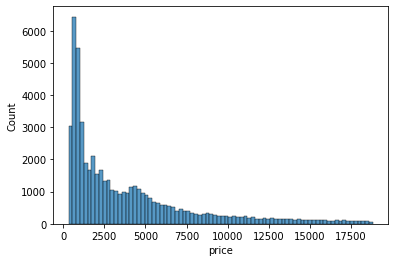

In [ ]:
sns.histplot(df.price)

In [ ]:
df.count().sort_values()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
dtype: int64

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['cut', 'color', 'clarity']

In [ ]:
con_cols = [col for col in df.columns if df[col].dtype != 'O']
con_cols

['carat', 'depth', 'table', 'price']

In [ ]:
# Funcion para contar los datos nulos y si son categoricos o continuos

def null_column(cols, quantity):
    for col in cols:
        if df[col].dtype != 'O':
            print('Column',col,'with data continuos y NaN',(df[col].isna().sum()),'which is', ((df[col].isna().sum())/quantity)*100,'%')
        else:
            print('Column',col,'with data categorical y NaN',(df[col].isna().sum()),'which is', ((df[col].isna().sum())/quantity)*100,'%')

In [ ]:
# Filtrar todas las columnas que contengan un valor nulo en cualquiera de las columnas
null_cols = df.columns[df.isna().any()].tolist()
quantity_values = len(df.index)
null_column(null_cols, quantity_values)

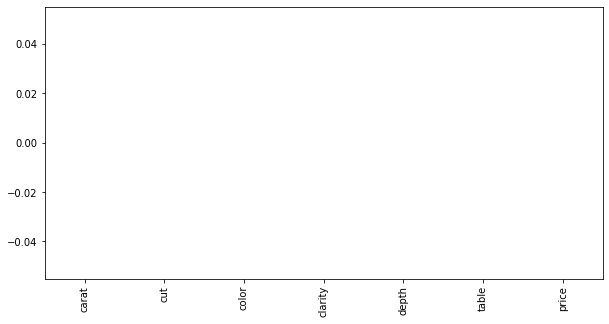

In [ ]:
df.isnull().sum().plot(kind='bar', figsize=(10, 5))
plt.show()

In [ ]:
df=df.dropna(how='any')

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
col_categorical = [var for var in df.columns if df[var].dtype=='O']
for i in col_categorical:
    print(f"{i}: {len(df[i].unique())} labels") # TODO: espanio o ingles?

cut: 5 labels
color: 7 labels
clarity: 8 labels


In [ ]:
# Ejemplo: obtener los diferentes valores de la columna Type
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

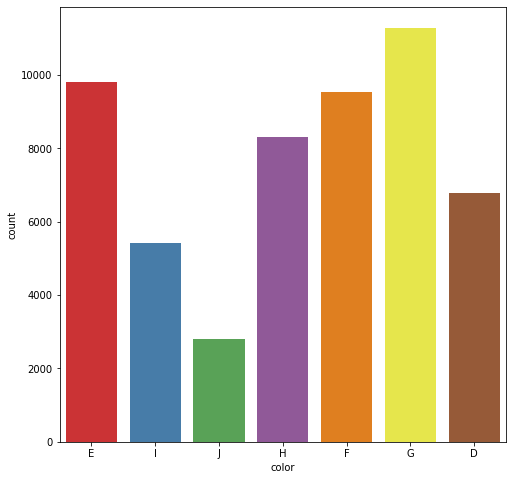

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(x="color", data=df, palette="Set1")
plt.show()

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [ ]:
def null_column(dataframe,dataset):
    for i in dataframe:
        dataset[i] = dataset[i].astype('category').cat.codes

In [ ]:
null_column(col_categorical,df)
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,2,1,3,61.5,55.0,326
1,0.21,3,1,2,59.8,61.0,326
2,0.23,1,1,4,56.9,65.0,327
3,0.29,3,5,5,62.4,58.0,334
4,0.31,1,6,3,63.3,58.0,335


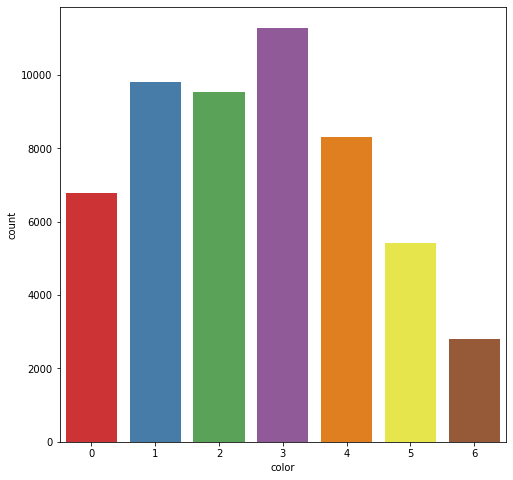

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(x="color", data=df, palette="Set1")
plt.show()

## Matriz de correlacion
Mide el grado de relación lineal entre cada par de elementos o variables.Si dos elementos tienden a aumentar o disminuir al mismo tiempo, el valor de correlación es positivo.
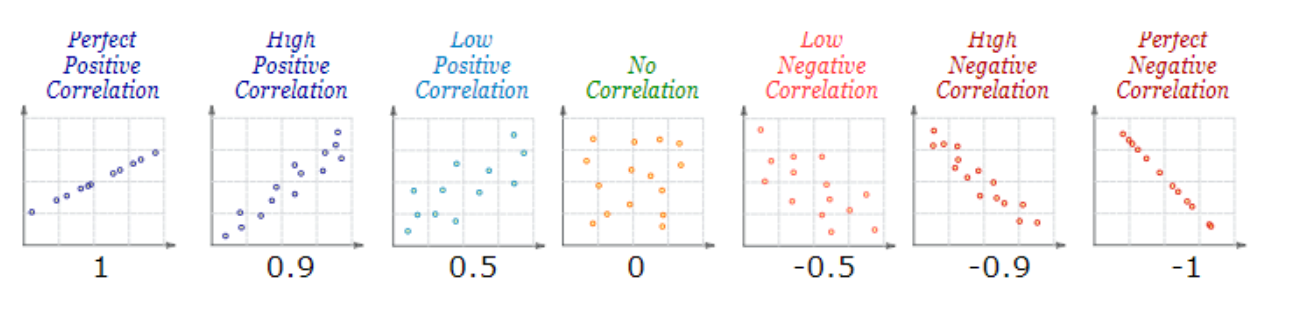

In [ ]:
df.corr()['price']
#df.corr()

carat      0.921591
cut        0.039860
color      0.172511
clarity   -0.071535
depth     -0.010647
table      0.127134
price      1.000000
Name: price, dtype: float64

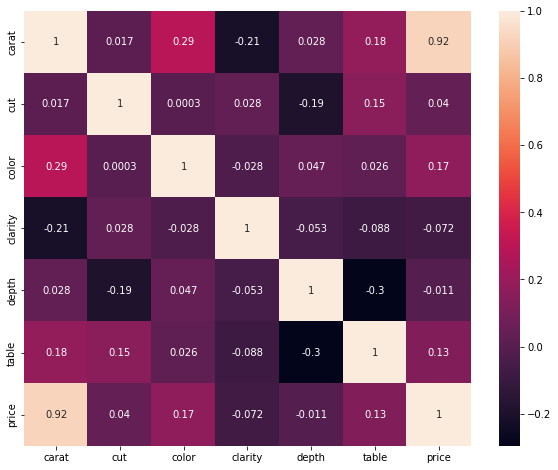

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),annot=True)

plt.show()

In [ ]:
df.drop(['depth'], axis = 1, inplace = True)

In [ ]:
df.corr()['price']

carat      0.921591
cut        0.039860
color      0.172511
clarity   -0.071535
table      0.127134
price      1.000000
Name: price, dtype: float64

In [ ]:
'''plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),annot=True)

plt.show()'''

'plt.figure(figsize=(10,8))\n\nsns.heatmap(df.corr(),annot=True)\n\nplt.show()'

In [ ]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [ ]:
x

,carat,cut,color,clarity,table
0,0.23,2,1,3,55.0
1,0.21,3,1,2,61.0
2,0.23,1,1,4,65.0
3,0.29,3,5,5,58.0
4,0.31,1,6,3,58.0
...,...,...,...,...,...
53935,0.72,2,0,2,57.0
53936,0.72,1,0,2,55.0
53937,0.70,4,0,2,60.0
53938,0.86,3,4,3,58.0


In [ ]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
regressor = LinearRegression()

In [ ]:
model = regressor.fit(x_train,y_train)

In [ ]:
y_pred = regressor.predict(x_test)

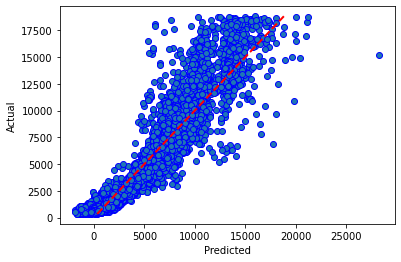

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Text(0.5, 1.0, 'Predicted vs Actual values')

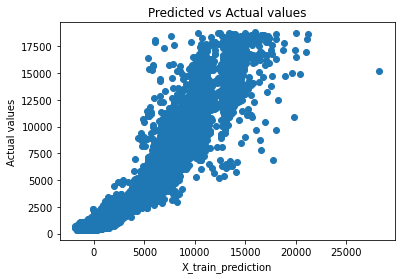

In [ ]:
# visualize actual and predicted values on test data
plt.scatter(y_pred,y_test)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', (metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 944.5841162768363
Mean Squared Error: 1988617.4174731025
R2 Score: 0.8818102166587859


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[8310.8290988    98.77616042 -258.23661608  305.30020305  -73.09873928]
743.7071682417782


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
carat,8310.829099
cut,98.776160
color,-258.236616
clarity,305.300203
table,-73.098739


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
44444,1591,2630.186609
25451,14208,13413.026727
20651,8941,8112.511212
16672,6664,5842.258334
24146,12315,6597.033672
...,...,...
37357,982,1439.610666
22097,10122,9887.162377
18314,7448,6819.523337
19731,8299,7341.412520


In [ ]:
print('train score:',regressor.score(x_train,y_train))
print('test score:',regressor.score(x_test,y_test))

train score: 0.8782926125163824
test score: 0.8818102166587859


## Modelo Ridge

In [ ]:
ridge_model = Ridge(alpha=0.01).fit(x_train,y_train)
print('train score:',ridge_model.score(x_train,y_train))
print('test score:',ridge_model.score(x_test,y_test))

train score: 0.878292612515115
test score: 0.8818101953138784


## Modelo Lasso

In [ ]:
lasso_model = Lasso(alpha=0.001).fit(x_train,y_train)
print('train score:',lasso_model.score(x_train,y_train))
print('test score:',lasso_model.score(x_test,y_test))

train score: 0.8782926125157813
test score: 0.8818102016214938
